In [1]:
import numpy as np
from sklearn.decomposition import FactorAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import sys
sys.path.append('../')
from Util import loadBeer,loadWine
from mpl_toolkits.mplot3d import axes3d, Axes3D

X_train, X_test, y_train, y_test= loadBeer()
transformer = FactorAnalysis(n_components=3)
faComponents = transformer.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])
faDf = pd.DataFrame(data = faComponents
             , columns = ['FA component 1', 'FA component 2','FA component 3'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
..\Util.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)


In [2]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(faDf)
y_kmeans = kmeans.predict(faDf)

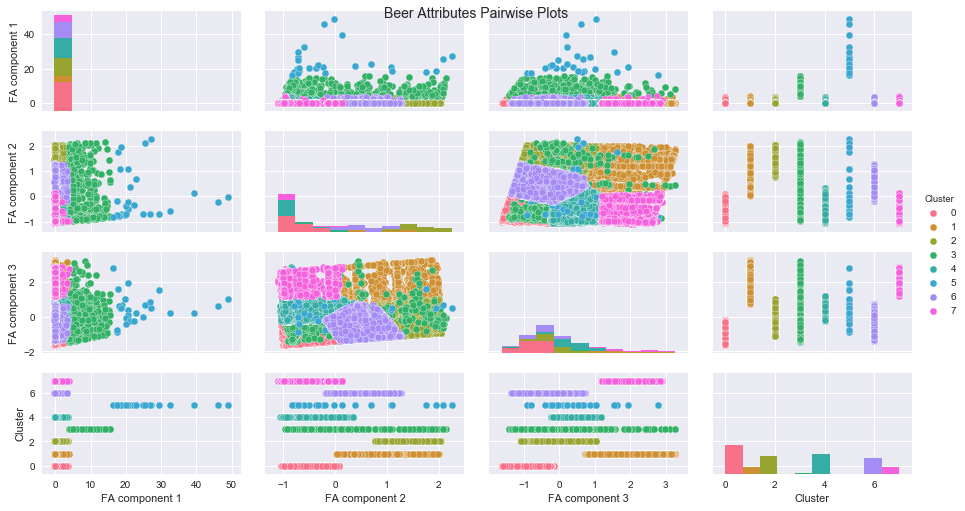

In [3]:
faDf['Cluster'] =y_kmeans
pp = sns.pairplot(faDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'FA component 3')

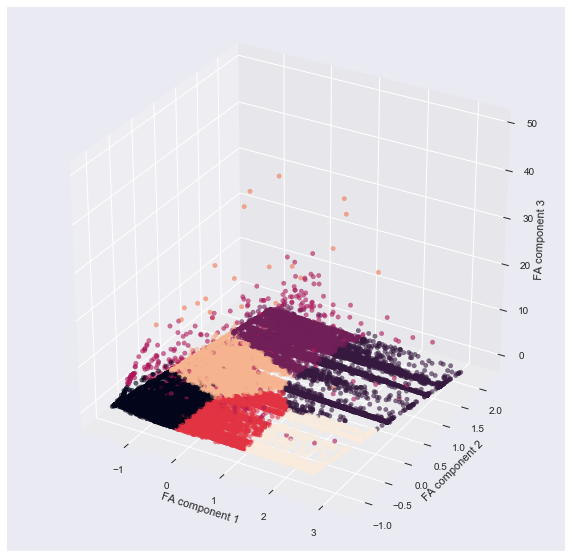

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
zs = faDf[['FA component 1']].values.flatten()
ys = faDf[['FA component 2']].values.flatten()
xs = faDf[['FA component 3']].values.flatten()
ax.scatter(xs, ys,zs,  alpha=0.6, c=y_kmeans)
ax.set_xlabel('FA component 1')
ax.set_ylabel('FA component 2')
ax.set_zlabel('FA component 3')